In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Problem statement 
IT Industry records the amount of time a software engineer needs to fix a bug in the initial phase of software development in 'debugging.csv.'

Let
X= Time needed to fix bugs 
X is a continuous random variable.Let's see the distribution of X and answer the below questions.

1. Find the probability that a randomly selected software debugging requires less than three hours
2. Find the probability that a randomly selected software debugging requires more than two hours
3. Find the 50th percentile of the software debugging time

In [3]:
debugging=pd.read_csv("debugging.csv")
debugging.head()

,Bug ID,Time Taken to fix the bug
0,12986,2.42
1,12987,2.03
2,12988,2.74
3,12989,3.21
4,12990,3.40


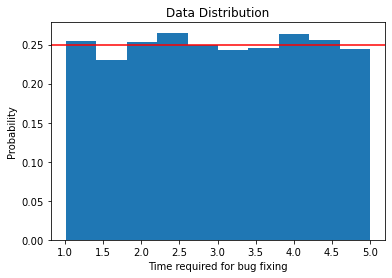

In [4]:
#visualize the distribution of the time needed for bug fixing
plt.hist(debugging["Time Taken to fix the bug"],density=True)
plt.axhline(1/4,color="red")
plt.xlabel("Time required for bug fixing")
plt.ylabel("Probability")
plt.title("Data Distribution")
plt.show()

C:\Users\Vikipedia\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


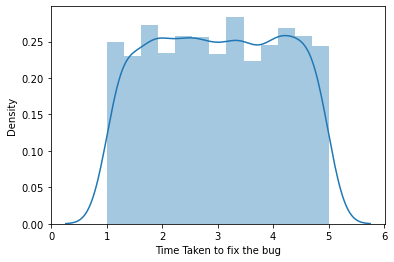

In [6]:
#sendity plot of time to fix the bug
sns.distplot(debugging["Time Taken to fix the bug"])
plt.show()

In [12]:
#import the required function
from scipy.stats import uniform

#use the uniform.pmf()function to generate the probability distribution
x=np.linspace(1,5,50)
probs=uniform.pdf(x,loc=1,scale=4)

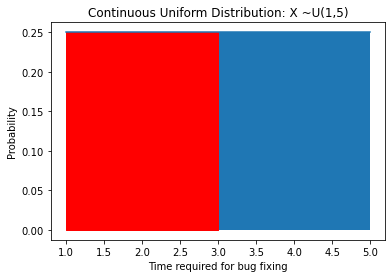

In [15]:
#plot the probability distribution
#We arae plotting the distributions here to better visualize the calculations
#of course you do not need to create the following visualization to answer the question above
#You can directly use the cdf funtion for probability calculations.
x1=np.linspace(1,3,25)
plt.plot(x,probs)
plt.fill_between(x,probs)
plt.fill_between(x1,uniform.pdf(x=x1,loc=1,scale=4),color="r")
plt.xlabel("Time required for bug fixing")
plt.ylabel("Probability")
plt.title("Continuous Uniform Distribution: X ~U(1,5)")
plt.show()

In [22]:
uniform.cdf(x=4.2,loc=1,scale=4)

0.8

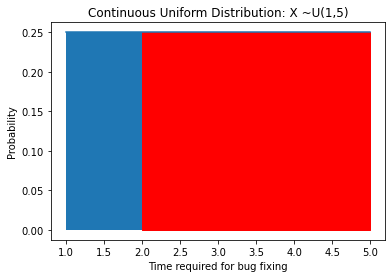

In [18]:
#Find the probability that a randomly selected softwarae bug fixing requires more than two hours. P(X>2)
x1=np.linspace(2,5,20)
plt.plot(x,probs)
plt.fill_between(x,probs)
plt.fill_between(x1,uniform.pdf(x=x1,loc=1,scale=4),color="r")
plt.xlabel("Time required for bug fixing")
plt.ylabel("Probability")
plt.title("Continuous Uniform Distribution: X ~U(1,5)")
plt.show()

In [19]:
1-uniform.cdf(x=2,loc=1,scale=4)

0.75

In [20]:
#50th percentile of software debugging time 50%
#ppf():it is used to calculate the percentile point given probability. It works opposite of cdf()
uniform.ppf(q=0.5,loc=1,scale=4)

#50% ofchance to be less than this hour

3.0

# Normal Distribution Handson
Problem Statement
A testing agency wants to analyze the complexity of SAT Exam 2020. They have collected the SAT scores of 1000 students in "sat_score.csv". Let's answer some of the questions that will help to decide the complexity of SAT exam 2020.
1. Calculate the probability that a student will score less than 800 in SAT exam
2. Calculate the probability that a student will score more than 1300 in SAT exam
3. Calculate the minimum marks a student must score in order to secure 90th percentile
4. Calculate the minimum marks a student must score in order to be in the top 5%

In [6]:
sat_score=pd.read_csv("sat_score.csv")
sat_score.head()

,student_id,score
0,1,1018
1,2,1218
2,3,611
3,4,723
4,5,541


## Calculate the mean and  standard deviation (parameters) of SAT SCORE

In [7]:
from scipy.stats import norm

#estimate the mean and standard deviation of the SAT scores data
mu = sat_score["score"].mean()
sigma=sat_score["score"].std()
print("The estimated mean is",round (mu,2))
print("The estimated standard deviation is",round(sigma,2))

The estimated mean is 1007.46
The estimated standard deviation is 204.43


## Ploting the Distribution
analyse the data and visualize the PDF of normal distribution using the parameters (mean(mu) and standard deviations sigma from the data

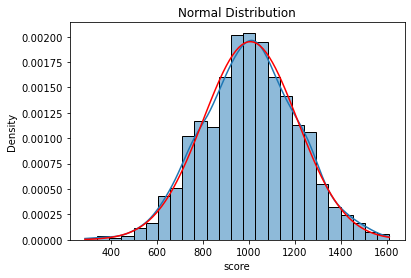

In [27]:
#calculate the pdf of sat using norm.pdf()
density = pd.DataFrame()
density["x"]=np.linspace(
    sat_score["score"].min()-0.01, sat_score["score"].max()+0.01,100
)
density["pdf"]=norm.pdf(density["x"],mu,sigma)

fig,ax=plt.subplots()
#plot the distribution of data using histogram
sns.histplot(sat_score["score"],ax=ax,kde=True,stat="density")
#plot the pdf of the normal distribution
ax.plot(density["x"],density["pdf"],color="red")
plt.title("Normal Distribution")
plt.show()

### Insights: as you can see in the above plot, there are two curves red and blue. Blue represents the shape of data distribution and red represents the PDF(Probability density function). This data is approximately normal. Thus, we can assume the data distribution to be normal and perform our calculations based on normality assumption. 

### Calculate the probability that a student will score less than 800 in SAT

In [39]:
#find the cumulative probability
#norm.cdf()calculates the cumlative probability
prob_less_than_800=norm.cdf(800,mu,sigma)
print(
    "The probability that a student will score less than 800 is",
    round(prob_less_than_800,4)
)

The probability that a student will score less than 800 is 0.1039


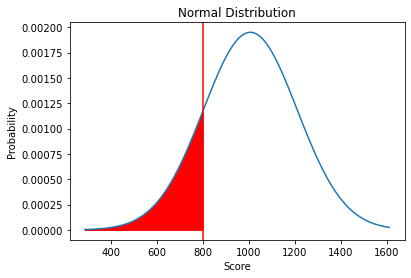

In [32]:
#plot the probability distribution
#we are plotting the distributions here to better visualize the calculations.
#of course you do not need to create teh following visualization to answer
#You can directly use the cdf function for probability calculations.
plt.plot(density["x"],density["pdf"])
plt.axvline(x=800,c="r") 
x1=np.linspace(density["x"].min(),800,50)
plt.fill_between(x1,norm.pdf(x1,mu,sigma),color="r")
plt.xlabel("Score")
plt.ylabel("Probability")
plt.title("Normal Distribution")
plt.show()

### more than 1300 SAT

In [33]:
#find the cumulayive probability and subtract it from 1 to calculate the probability that a student score more than 1300
prob_greater_than_1300=1-norm.cdf(1300,mu,sigma)
print(
    "The probability that a student will score more than 1300 is",
    round(prob_greater_than_1300,4),
)

The probability that a student will score more than 1300 is 0.0762


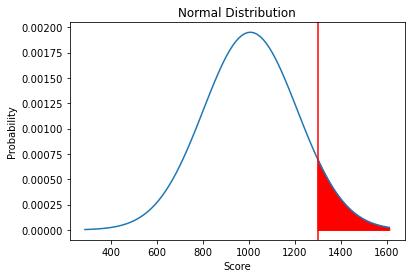

In [38]:
plt.plot(density["x"], density["pdf"])
plt.axvline(x=1300,c="r")
x1=np.linspace(1300,density["x"].max(),50)
plt.fill_between(x1,norm.pdf(x1,mu,sigma),color="r")
plt.xlabel("Score")
plt.ylabel("Probability")
plt.title("Normal Distribution")
plt.show()

In [ ]:
#calculate the minimum marks a student must score in order to be in the 90th percentile
#norm.ppf()calculates the percentile point

In [42]:
score_90th_percentile=norm.ppf(0.90,mu,sigma)
print("The 90th percentile score should be",round(score_90th_percentile))

The 90th percentile score should be 1269


# Z Score handson 
Standardization of normal variables
Suppose we know that the SAT scores are normally disturbed with mean 1000 and standard deviation 200 and ACT scores and are normally distributed with mean 20 and standard deviation 5.

A college provides admission only in the basis of SAT and ACT scores. The college admin decides to give the top performer fellowships to the students who has performed the best aming all applicants. The highest score received from applicants who appeared for SAT is 1350 and the highest score received from applicants who appeared for ACT is 30.
Help the college to choose the best candidate for the fellowship.

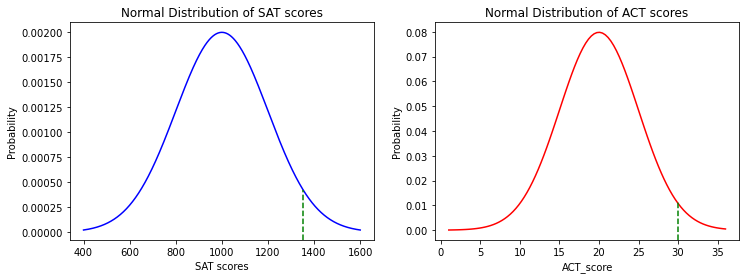

In [46]:
#plot the two distribution for SAT and ACT scores
#we are plotting distributionm you can use cdf function for probability calculation
from scipy.stats import norm
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,4))
x=np.linspace(400,1600,1000)
ax1.plot(x,norm.pdf(x,loc=1000,scale=200),color='b')
ax1.set_title('Normal Distribution of SAT scores')
ax1.set_xlabel('SAT scores')
ax1.set_ylabel('Probability')
ax1.axvline(1350,ymax=0.23,linestyle='--',color='green')
x1=np.linspace(1,36,100)
ax2.plot(x1,norm.pdf(x1,loc=20,scale=5),color='r')
ax2.set_title('Normal Distribution of ACT scores')
ax2.set_xlabel('ACT_score')
ax2.set_ylabel('Probability')
ax2.axvline(30,ymax=0.18,linestyle='--',color='green')
plt.show()

In [47]:
#find the Z-score of the highest scorer in SAT among all the applicants
top_sat=(1350-1000)/200
print('The Z-score of the highest scorer in SAT among all the applicants',top_sat)
#find the Z-score of highest scorer in ACT among all the applicants
top_act=(30-20)/5
print('The Z-score of highest scorerin ACT among all the applicants',top_act)

The Z-score of the highest scorer in SAT among all the applicants 1.75
The Z-score of highest scorerin ACT among all the applicants 2.0


##Let's plot and standard normal distribution and visualize the above standardized scores.

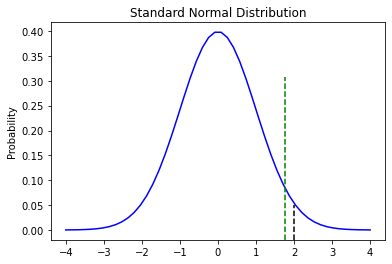

In [50]:
#plot the standard normal distribution
#visualize the standardized scores
#we are plotting the distribution here to better visualize the calculations
#you can directly create use the cdf function for probability calculations
fig,ax=plt.subplots()
x=np.linspace(-4,4,50)
ax.plot(x,norm.pdf(x,loc=0,scale=1),color='b')
ax.set_title('Standard Normal Distribution')
ax.set_label('Z-scores')
ax.set_ylabel('Probability')
ax.axvline(top_sat,ymax=0.75,linestyle='--',color='green')
ax.axvline(top_act,ymax=0.16,linestyle='--',color='black')
plt.show()

In [11]:
import scipy.stats as sc
sc.norm.cdf(-0.887,loc=0,scale=1)-sc.norm.cdf(0.765,loc=0,scale=1)

-0.5903247774460736

In [ ]:
import scipy.stats as sc
sc.norm.cdf(0.73,loc=0,scale=1)-sc.norm.cdf(0.765,loc=0,scale=1)

In [10]:
binom.cdf(k=7,n=n,p=p)

NameError: name 'binom' is not defined

In [12]:
barl=plt.bar(k,binomial)
plt.title("Binomial:n=%i,p=%.2f"%(n,p),fontsize=15)
plt.xlabel("Number of Success")
plt.ylabel("Probability of Success")
for i in range(0,8):
    barl[i].set_color("r")
plt.show()

NameError: name 'k' is not defined